# Tarea 2: Métodos de descenso de gradiente
## Para el curso de inteligencia artificial, CIMAT
## Alan García Zermeño
### 3 de marzo de 2023


---




In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from sklearn.datasets import load_iris

## Cargamos los datos iris y tomamos las características "sepal lenght" y "sepal width" de etiquetas "Setosa" y "Versicolor". Hacemos un shuffle aleatorio al conjunto de 100 datos y lo dividimos en 80 de entrenamiento y 20 de prueba.
## Graficamos los datos y coloreamos de verde y rojo segun la etiqueta la parte de entrenamiento y en azul la parte de prueba.
## Usaremos algoritmos distintos para calcular los valores óptimos de $\theta$ para minimizar la función:
## $$\text{arg } \min_{\theta} F(\theta) = \frac{1}{2}\sum \limits_{i=1}^m [y_i - \phi(x_i^\intercal \omega)]^2$$

In [ ]:
iris = load_iris()
g = np.arange(0,100,1)
random.shuffle(g)
iris_data = iris.data[:100,:2]
X = np.array([iris_data[i] for i in g])
X_tr = X[:80]; X_ts = X[80:]
Y = iris.target[:100]
Y = np.array([Y[i] for i in g])
Y_tr = Y[:80]; Y_ts = Y[80:]
Y_tr.shape = (80,1); Y_ts.shape = (20,1)
iris.feature_names[:2]

['sepal length (cm)', 'sepal width (cm)']

(4.165, 7.135, 1.88, 4.5200000000000005)

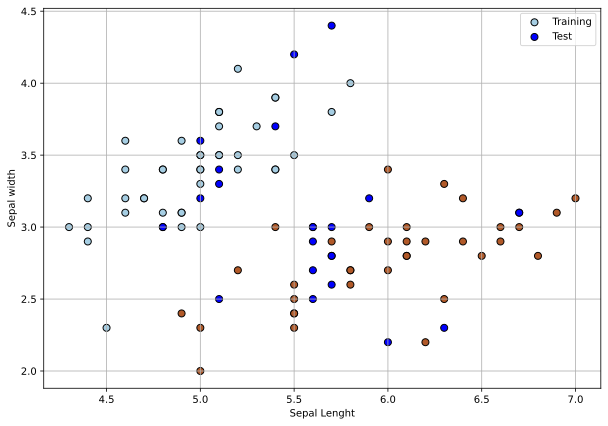

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)
plt.scatter(X_tr[:,0],X_tr[:,1], c=Y_tr, cmap=plt.cm.Paired, edgecolor='black', s=50, label = ("Training"))
plt.scatter(X_ts[:,0],X_ts[:,1], c="blue", cmap=plt.cm.Paired, edgecolor='black', s=50, label = ("Test"))
plt.grid()
plt.legend()
plt.xlabel("Sepal Lenght")
plt.ylabel("Sepal width")
plt.axis('tight')

# Stochastic Gradient Descent (SGD)

In [ ]:
def sigmo(theta,x):
  f = theta[0]*x[:,0] + theta[1]*x[:,1] + theta[2]
  return(1/(1+np.exp(-f)))

In [ ]:
def grad_sigm(theta, f_params):
    kappa= f_params['kappa']
    X    = f_params['X']
    y    = f_params['y']
    er=sigmo(theta,X)
    partial0,partial1,partial2 = np.zeros((len(X),1)),np.zeros((len(X),1)),np.zeros((len(X),1))
    for i in range(len(X)):
      partial0[i] = (er[i]-y[i])*er[i]*(1-er[i])*X[i,0]
      partial1[i] = (er[i]-y[i])*er[i]*(1-er[i])*X[i,1]
      partial2[i] = (er[i]-y[i])*er[i]*(1-er[i])
    gradient= np.concatenate((partial0,partial1, partial2), axis=1)
    f = np.mean(gradient, axis=0).shape
    print(f)
    return (np.mean(gradient, axis=0),np.linalg.norm(gradient))

In [ ]:
def SGD(theta=[], grad=None, gd_params=[], f_params=[]):
    (high,dim) = f_params['X'].shape
    batch_size = gd_params['batch_size']   
    nIter      = gd_params['nIter']
    alpha      = gd_params['alpha']
        
    Theta=[]
    Gnorm = []
    for t in range(nIter):
        # Set of sampled indices
        smpIdx = np.random.randint(low=0, high=high, size=batch_size, dtype='int32')
        # sample 
        smpX = f_params['X'][smpIdx]
        smpy = f_params['y'][smpIdx]
        # parametros de la funcion objetivo
        smpf_params ={'kappa' : f_params['kappa'], 
                      'X'     : smpX , 
                      'y'     : smpy}
        
        p,no = grad(theta,f_params=smpf_params)
        theta = theta - alpha*p
        Theta.append(theta)
        Gnorm.append(no)
        
    return(np.array(Theta),np.array(Gnorm))

In [ ]:
theta = np.random.normal(size=3)
thetaSGD,Gnorm = SGD(theta = theta,grad = grad_sigm ,gd_params = {"nIter":1,"alpha":0.5,"batch_size":40}, 
               f_params = {"kappa" :0.01,"X" :X_tr,"y" :Y_tr})
print('Inicio:', theta,'-> Fin:', thetaSGD[-1,:])

(3,)
Inicio: [ 0.55054789  0.1103188  -0.97075868] -> Fin: [ 0.43718553  0.0311431  -0.99390029]


Text(0.5, 0, 'Iteraciones')

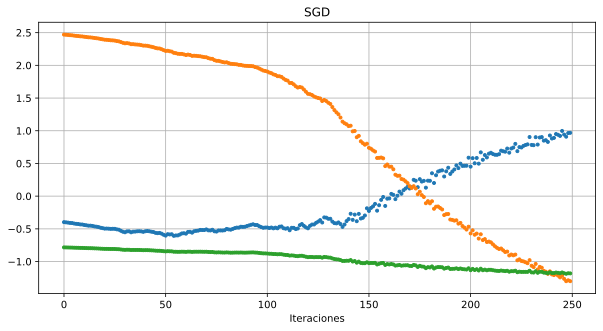

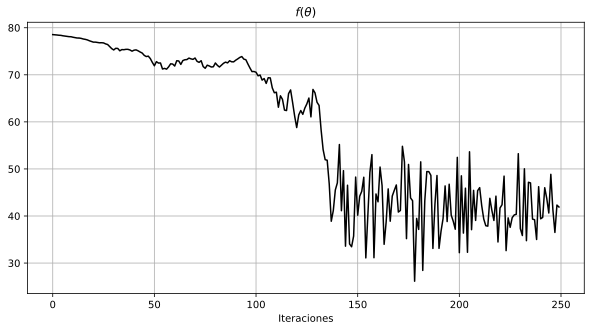

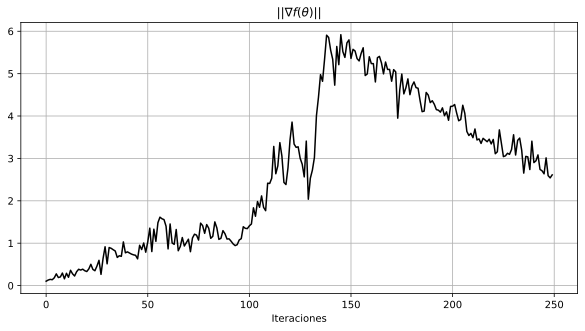

In [ ]:
plt.figure(figsize=(10,5));plt.plot(thetaSGD, '.');plt.grid();plt.title('SGD');plt.xlabel("Iteraciones")
plt.figure(figsize=(10,5));
it = np.arange(0,len(thetaSGD),1)
fo = []
for i in range(len(thetaSGD)):
  fo.append(abs(sum(sigmo(thetaSGD[i],X_tr))))

plt.plot(it,fo,c = "black");plt.grid();plt.title(r'$f(\theta)$');plt.xlabel("Iteraciones")
plt.figure(figsize=(10,5));plt.plot(it,Gnorm,c = "black");plt.grid();plt.title(r'$||\nabla f(\theta)$||');plt.xlabel("Iteraciones")

## Ahora, usamos los parámetros óptimos de $\theta$ para evaluar los datos de prueba:

In [ ]:
f = sigmo(thetaSGD[-1],X_ts)
col = []
s = 0
for i in range(20):
  if f[i] < 0.5:
    col.append(0)
  else:
    col.append(1)
  if col[i] == Y_ts[i]:
    s+=1
print("Accuracy:",(s/20)*100,"%")

Accuracy: 100.0 %


(4.165, 7.135, 1.88, 4.5200000000000005)

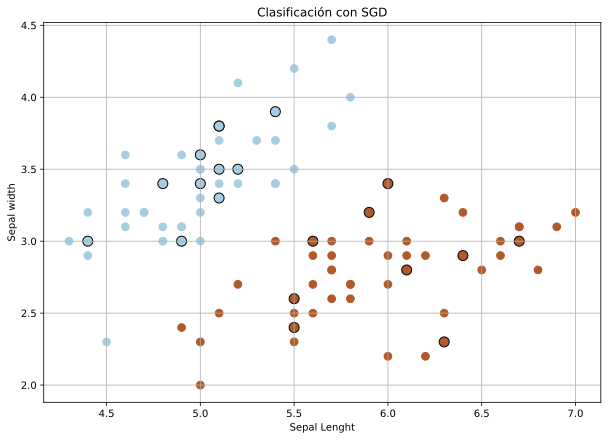

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)
plt.scatter(X_tr[:,0], X_tr[:,1], c=Y_tr, cmap=plt.cm.Paired, s=60)
plt.scatter(X_ts[:,0], X_ts[:,1], c=col, cmap=plt.cm.Paired, edgecolor='black', s=100)
plt.grid()
plt.title("Clasificación con SGD")
plt.xlabel("Sepal Lenght")
plt.ylabel("Sepal width")
plt.axis('tight')

#SDG con inercia

In [ ]:
def MGD(theta=[], grad=None, gd_params={}, f_params={}):
    nIter = gd_params['nIter']
    alpha = gd_params['alpha'] 
    eta   = gd_params['eta']
    p_old = np.zeros(theta.shape)
    Theta=[]
    Gnorm = []
    for t in range(nIter):
        g,no = grad(theta, f_params=f_params)
        p = g + eta*p_old
        theta = theta - alpha*p
        p_old=p
        Theta.append(theta)
        Gnorm.append(no)
    return(np.array(Theta),np.array(Gnorm))

In [ ]:
theta = np.random.normal(size=3)
thetaMGD,Gnorm = MGD(theta = theta,grad = grad_sigm ,gd_params = {"nIter":250,"alpha":0.95,"batch_size":40,"eta":0.9}, 
               f_params = {"kappa" :0.01,"X" :X_tr,"y" :Y_tr})
print('Inicio:', theta,'-> Fin:', thetaMGD[-1,:])

Inicio: [ 0.22397871 -0.73041498 -0.05166771] -> Fin: [ 4.19311362 -6.9193494  -1.38849071]


Text(0.5, 0, 'Iteraciones')

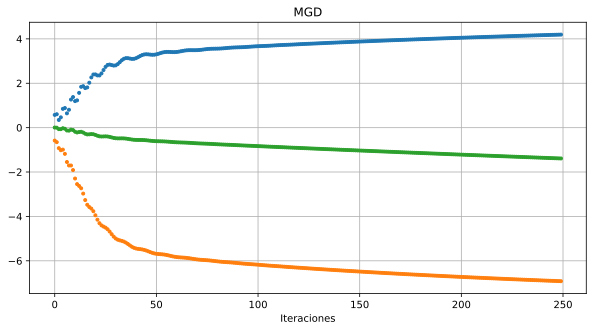

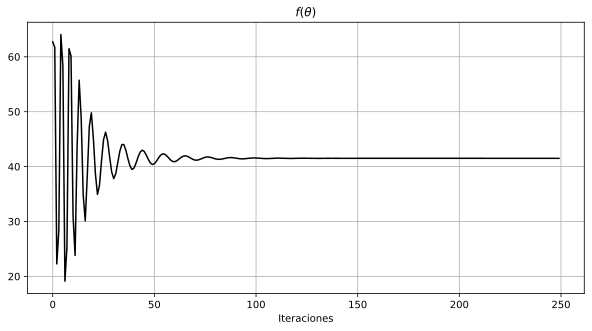

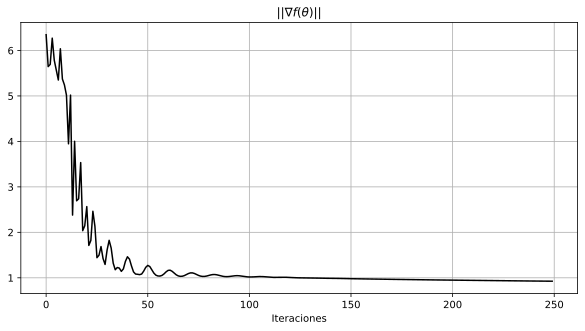

In [ ]:
plt.figure(figsize=(10,5));plt.plot(thetaMGD, '.');plt.grid();plt.title('MGD');plt.xlabel("Iteraciones")
plt.figure(figsize=(10,5));
it = np.arange(0,len(thetaMGD),1)
fo = []
for i in range(len(thetaMGD)):
  fo.append(abs(sum(sigmo(thetaMGD[i],X_tr))))

plt.plot(it,fo,c = "black");plt.grid();plt.title(r'$f(\theta)$');plt.xlabel("Iteraciones")
plt.figure(figsize=(10,5));plt.plot(it,Gnorm,c = "black");plt.grid();plt.title(r'$||\nabla f(\theta)$||');plt.xlabel("Iteraciones")

In [ ]:
f = sigmo(thetaMGD[-1],X_ts)
col = []
s = 0
for i in range(20):
  if f[i] < 0.5:
    col.append(0)
  else:
    col.append(1)
  if col[i] == Y_ts[i]:
    s+=1
print("Accuracy:",(s/20)*100,"%")

Accuracy: 100.0 %


(4.165, 7.135, 1.88, 4.5200000000000005)

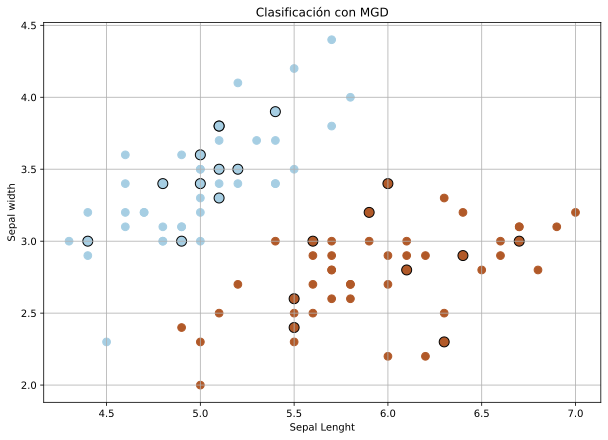

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)
plt.scatter(X_tr[:,0], X_tr[:,1], c=Y_tr, cmap=plt.cm.Paired, s=60)
plt.scatter(X_ts[:,0], X_ts[:,1], c=col, cmap=plt.cm.Paired, edgecolor='black', s=100)
plt.grid()
plt.title("Clasificación con MGD")
plt.xlabel("Sepal Lenght")
plt.ylabel("Sepal width")
plt.axis('tight')

# Nesterov (NAG)

In [ ]:
def NAG(theta=[], grad=None, gd_params={}, f_params={}):
    nIter = gd_params['nIter']
    alpha = gd_params['alpha'] 
    eta   = gd_params['eta']
    p     = np.zeros(theta.shape)
    Theta=[]
    Gnorm = []
    for t in range(nIter):
        pre_theta = theta - 2.0*alpha*p
        g,no = grad(pre_theta, f_params=f_params)
        p = g + eta*p
        theta = theta - alpha*p
        Theta.append(theta)
        Gnorm.append(no)
    return(np.array(Theta),np.array(Gnorm))

In [ ]:
theta = np.random.normal(size=3)
thetaNAG,Gnorm = NAG(theta = theta,grad = grad_sigm ,gd_params = {"nIter":250,"alpha":0.5,"batch_size":40,"eta":0.9}, 
               f_params = {"kappa" :0.01,"X" :X_tr,"y" :Y_tr})
print('Inicio:', theta,'-> Fin:', thetaNAG[-1,:])

Inicio: [-0.16063893  1.12178299 -0.65861287] -> Fin: [ 3.57788377 -5.73705399 -1.70186972]


Text(0.5, 0, 'Iteraciones')

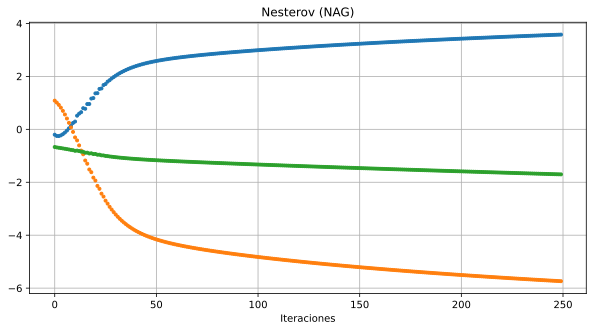

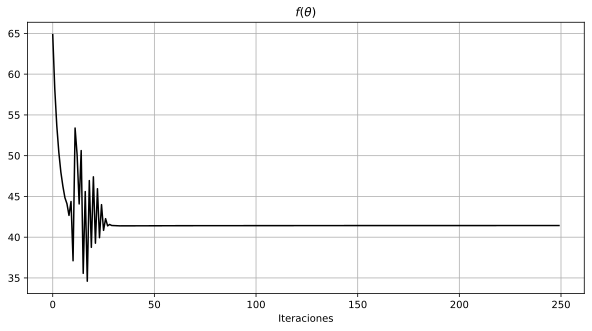

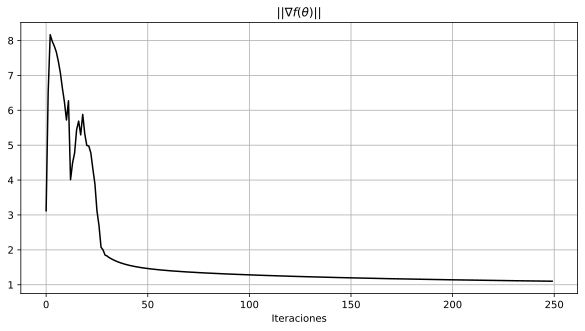

In [ ]:
plt.figure(figsize=(10,5));plt.plot(thetaNAG, '.');plt.grid();plt.title('Nesterov (NAG)');plt.xlabel("Iteraciones")
plt.figure(figsize=(10,5));
it = np.arange(0,len(thetaNAG),1)
fo = []
for i in range(len(thetaNAG)):
  fo.append(abs(sum(sigmo(thetaNAG[i],X_tr))))

plt.plot(it,fo,c = "black");plt.grid();plt.title(r'$f(\theta)$');plt.xlabel("Iteraciones")
plt.figure(figsize=(10,5));plt.plot(it,Gnorm,c = "black");plt.grid();plt.title(r'$||\nabla f(\theta)$||');plt.xlabel("Iteraciones")

In [ ]:
f = sigmo(thetaNAG[-1],X_ts)
col = []
s = 0
for i in range(20):
  if f[i] < 0.5:
    col.append(0)
  else:
    col.append(1)
  if col[i] == Y_ts[i]:
    s+=1
print("Accuracy:",(s/20)*100,"%")

Accuracy: 100.0 %


(4.165, 7.135, 1.88, 4.5200000000000005)

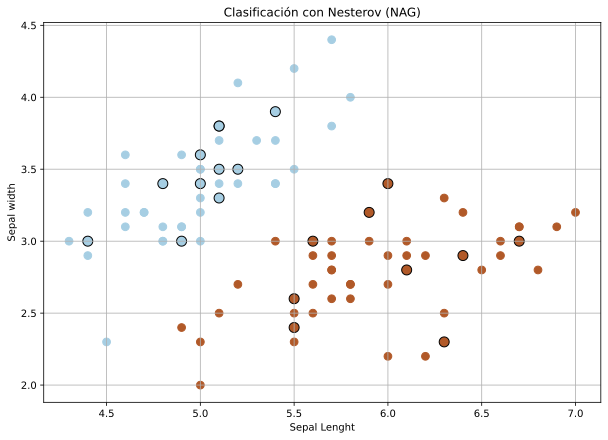

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)
plt.scatter(X_tr[:,0], X_tr[:,1], c=Y_tr, cmap=plt.cm.Paired, s=60)
plt.scatter(X_ts[:,0], X_ts[:,1], c=col, cmap=plt.cm.Paired, edgecolor='black', s=100)
plt.grid()
plt.title("Clasificación con Nesterov (NAG)")
plt.xlabel("Sepal Lenght")
plt.ylabel("Sepal width")
plt.axis('tight')

# ADAM

In [ ]:
def ADAM(theta=[], grad=None, gd_params={}, f_params={}):
    epsilon= 1e-8
    nIter    = gd_params['nIter']
    alpha    = gd_params['alphaADAM'] 
    eta1     = gd_params['eta1']
    eta2     = gd_params['eta2']
    p        = np.zeros(theta.shape)
    v        = 0.0
    Theta    = []
    Gnorm = []
    eta1_t = eta1
    eta2_t = eta2
    for t in range(nIter):
        g,no  = grad(theta, f_params=f_params)
        p  = eta1*p + (1.0-eta1)*g
        v  = eta2*v + (1.0-eta2)*(g**2)
        #p = p/(1.-eta1_t)
        #v = v/(1.-eta2_t)
        theta = theta - alpha * p / (np.sqrt(v)+epsilon)
        eta1_t *= eta1
        eta2_t *= eta2
        Theta.append(theta)
        Gnorm.append(no)
    return(np.array(Theta),np.array(Gnorm))

In [ ]:
theta = np.random.normal(size=3)
thetaADAM,Gnorm = ADAM(theta = theta,grad = grad_sigm ,gd_params = {"nIter":400,"alphaADAM":0.001,"batch_size":100,"eta1":0.9,"eta2":0.999}, 
               f_params = {"kappa" :0.01,"X" :X_tr,"y" :Y_tr})
print('Inicio:', theta,'-> Fin:', thetaADAM[-1,:])

Inicio: [ 0.61012782 -0.45203615 -0.81605819] -> Fin: [ 0.8136861  -1.07549778 -1.0687051 ]


Text(0.5, 0, 'Iteraciones')

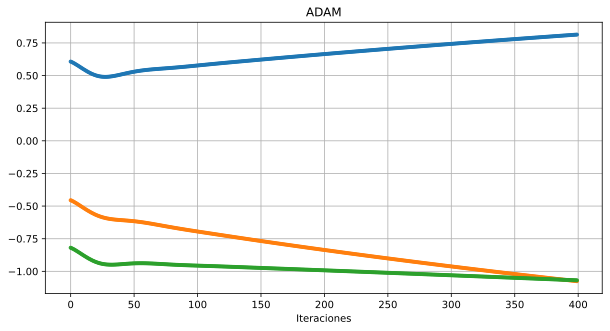

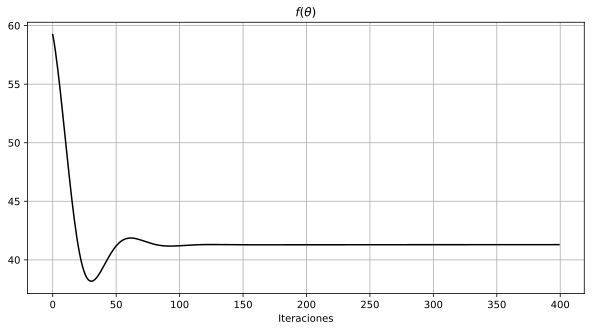

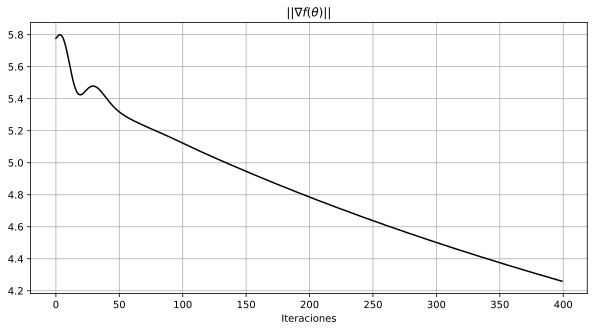

In [ ]:
plt.figure(figsize=(10,5));plt.plot(thetaADAM, '.');plt.grid();plt.title('ADAM');plt.xlabel("Iteraciones")
plt.figure(figsize=(10,5));
it = np.arange(0,len(thetaADAM),1)
fo = []
for i in range(len(thetaADAM)):
  fo.append(abs(sum(sigmo(thetaADAM[i],X_tr))))

plt.plot(it,fo,c = "black");plt.grid();plt.title(r'$f(\theta)$');plt.xlabel("Iteraciones")
plt.figure(figsize=(10,5));plt.plot(it,Gnorm,c = "black");plt.grid();plt.title(r'$||\nabla f(\theta)$||');plt.xlabel("Iteraciones")

In [ ]:
f = sigmo(thetaADAM[-1],X_ts)
col = []
s = 0
for i in range(20):
  if f[i] < 0.5:
    col.append(0)
  else:
    col.append(1)
  if col[i] == Y_ts[i]:
    s+=1
print("Accuracy:",(s/20)*100,"%")

Accuracy: 100.0 %


(4.165, 7.135, 1.88, 4.5200000000000005)

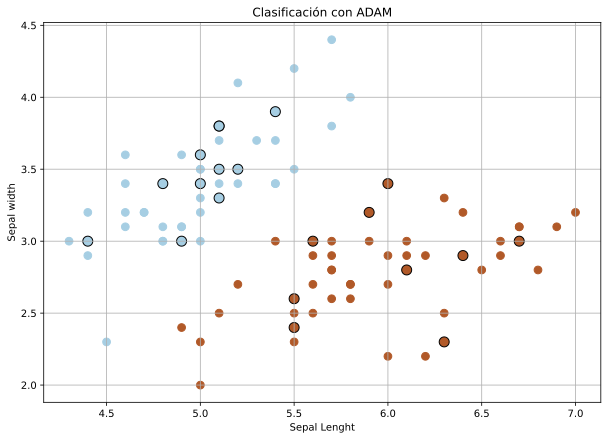

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)
plt.scatter(X_tr[:,0], X_tr[:,1], c=Y_tr, cmap=plt.cm.Paired, s=60)
plt.scatter(X_ts[:,0], X_ts[:,1], c=col, cmap=plt.cm.Paired, edgecolor='black', s=100)
plt.grid()
plt.title("Clasificación con ADAM")
plt.xlabel("Sepal Lenght")
plt.ylabel("Sepal width")
plt.axis('tight')